In [23]:
import os
import re
import sys
import sklearn as skl
import math

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

from data_grid import DataGrid

from sklearn.decomposition import PCA

from sklearn.decomposition import NMF

from sklearn.metrics import adjusted_mutual_info_score as ami_score

from sklearn.metrics import fowlkes_mallows_score as fm_score

from sklearn.metrics import adjusted_rand_score as ar_score

#from data_grid_TiNiSn import DataGrid#, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

from Agglo_cluster import Agglo_cluster

from peak_removal import peak_rem

#import dataproc.operations

#from dataproc.operations.hitp import bayesian_block_finder
#from dataproc.operations.peakShapes import voigtFn
# from NMF import nmf_func
# from scipy.signal import find_peaks
# from scipy.stats import pearsonr
# from scipy.spatial.distance import jensenshannon as jsd
# from NMF_Cluster import nmf_cluster

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dataGrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [2]:
dataGrid = DataGrid_TiNiSn_500C()

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [3]:
y_data=dataGrid.get_data_array()
x_data=dataGrid.data[1][:,0]
#np.savetxt('TiNiSn_500C_dataset.csv',np.transpose(y_data),delimiter =',')
#np.savetxt('TiNiSn_500C_xvalues.csv',np.transpose(x_data),delimiter=',')

(177, 800)


In [4]:
truth_labels=list([4,4,4,4,4])+list([4,4,4,4,4,4,4,3,3])+list([4,4,4,4,4,4,4,3,3,3,3])+list([4,4,4,11,4,4,4,4,3,3,3,2,2])+list([4,4,4,11,11,4,4,4,3,3,2,2,1])+list([5,5,4,11,11,11,4,4,5,5,2,2,1,1,1])+list([6,5,5,11,11,11,4,5,5,2,2,1,1,1,1])+list([7,6,5,5,11,11,5,5,2,2,1,1,1,1,1])+list([7,7,6,5,5,5,5,10,10,2,1,1,1,1,1])+list([7,7,6,6,10,10,10,10,10,9,1,1,1,1,1])+list([8,8,6,6,6,6,9,9,9,1,1,1,1])+list([8,8,8,6,9,9,9,9,9,1,1,1,1])+list([8,8,6,9,9,9,9,1,1,1,1])+list([8,6,9,9,9,9,1,1,1])+list([9,9,9,1,1])

In [5]:
len(truth_labels)

177

In [6]:
#This part of the code is a savior
new_truth_labels=[None]*177
for ii in range(0,177):
    x,y=dataGrid.coord(ii+1)
    new_grid=dataGrid.grid_num(16-x,y)
    new_truth_labels[new_grid-1]=truth_labels[ii]


In [7]:
#Get the spectra grid numbers in each cluster
Big_clustlab=[]
for i in range(1,max(new_truth_labels)+1):
    clustlab=[]
    for j,v in enumerate(new_truth_labels):
        if v==i:
            clustlab.append(j+1)
    Big_clustlab.append(clustlab)

In [8]:
grid_labels =[]
adj_labels=[]
grid_coord = []
adj_coord=[]

for i in range(1,178):
    x,y = dataGrid.coord(i)
    grid_labels.append([i,x,y,truth_labels[i-1]])
    adj_labels.append([i,15-x,y-1,truth_labels[i-1]]) 
    grid_coord.append([i,x,y])
    adj_coord.append([i,15-x,y-1])
    

In [21]:
Big_clustlab[0]

[39,
 52,
 53,
 54,
 67,
 68,
 69,
 70,
 82,
 83,
 84,
 85,
 86,
 97,
 98,
 99,
 100,
 101,
 112,
 113,
 114,
 115,
 116,
 127,
 128,
 129,
 130,
 140,
 141,
 142,
 143,
 153,
 154,
 155,
 156,
 164,
 165,
 166,
 173,
 174]

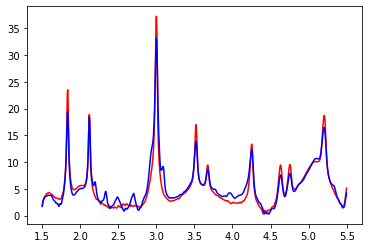

In [8]:
fig,ax = plt.subplots()
ax.plot(x_data,np.sqrt(y_data[62-1]+0.1),'r')
ax.plot(x_data,np.sqrt(y_data[44-1]+0.1),'b')


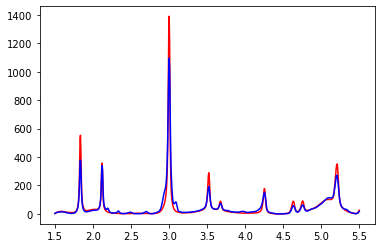

In [9]:
fig,ax = plt.subplots()
ax.plot(x_data,y_data[62-1],'r')
ax.plot(x_data,y_data[44-1],'b')


In [10]:
dot_product = np.dot((y_data[62-1]), (y_data[44-1]))
norm_a = np.linalg.norm((y_data[62-1]))
norm_b = np.linalg.norm((y_data[44-1]))
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.021749634383156025

In [11]:
dot_product = np.dot((y_data[62-1]), (y_data[128-1]))
norm_a = np.linalg.norm((y_data[62-1]))
norm_b = np.linalg.norm((y_data[128-1]))
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.762640393672728

In [12]:
dot_product = np.dot(np.sqrt(y_data[62-1]), np.sqrt(y_data[44-1]))
norm_a = np.linalg.norm(np.sqrt(y_data[62-1]))
norm_b = np.linalg.norm(np.sqrt(y_data[44-1]))
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.014668517831826544

In [13]:
dot_product = np.dot(np.sqrt(y_data[62-1]), np.sqrt(y_data[128-1]))
norm_a = np.linalg.norm(np.sqrt(y_data[62-1]))
norm_b = np.linalg.norm(np.sqrt(y_data[128-1]))
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.2503509315294252

In [14]:
dot_product = np.dot(y_data[76], y_data[44])
norm_a = np.linalg.norm(y_data[76-1])
norm_b = np.linalg.norm(y_data[44-1])
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.05765537387355113

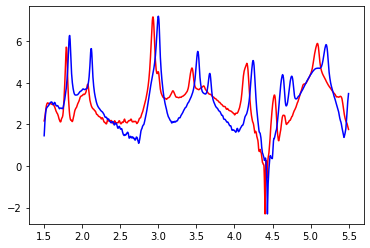

In [15]:
fig,ax = plt.subplots()
ax.plot(x_data,np.log(y_data[128-1]+0.1),'r')
ax.plot(x_data,np.log(y_data[76-1]+0.1),'b')

In [16]:
dot_product = np.dot(np.log(y_data[128-1]+0.1), np.log(y_data[76-1]+0.1))
norm_a = np.linalg.norm(np.log(y_data[128-1]+0.1))
norm_b = np.linalg.norm(np.log(y_data[76-1]+0.1))
sim = 1 - (dot_product / (norm_a * norm_b))
sim

0.05695393819881378

In [17]:
dot_product = np.dot(y_data[128-1], y_data[76-1])
norm_a = np.linalg.norm(y_data[128-1])
norm_b = np.linalg.norm(y_data[76-1])
sim = 1-(dot_product / (norm_a * norm_b))
sim

0.7306028757496154

# Comparing spectra 44,76,&128

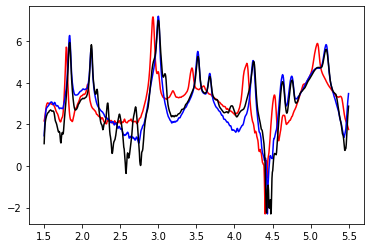

In [18]:
fig,ax = plt.subplots()
ax.plot(x_data,np.log(y_data[128-1]+0.1),'r')
ax.plot(x_data,np.log(y_data[76-1]+0.1),'b')
ax.plot(x_data,np.log(y_data[44-1]+0.1),'k')

### Cosine, JSD (Jenssen Shannon Divergence), Pearsonn & AveSim(average of Pearsonn and Cosine)  

Here we compare spectra 44, 76, and 128. You'd need to uncomment the desired similarity metric.
The final result has three arrays. The first one is the comaprison between 76||128, the second 44||76, the third is the ratio
between the comparison.Each array has six elements which signify how the dataset was handled: log, fourier, power 1, 2, 3, 0.5 

In [19]:
#Comparing 76 & 128

Big_sim1 = []

a = np.log(y_data[76-1]+1)
b = np.log(y_data[128-1]+1)

##Cosine
# dot_product = np.dot(a, b)
# norm_a = np.linalg.norm(a)
# norm_b = np.linalg.norm(b)
# sim1 = 1 - (dot_product / (norm_a * norm_b))

##JSD
#sim1 = jsd(a,b)

##Pearsonn
# sim1,_ = pearsonr(a,b)
# sim1 = 1 - sim1

##AveSim
corr1, _ = pearsonr(a,b)
corr1 = 1 - corr1
dot_product = np.dot(a, b)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
corr2 = 1 - (dot_product / (norm_a * norm_b))
sim1 = np.mean([corr1,corr2])

Big_sim1.append(sim1)



a = np.fft.fft(y_data[76-1]).real
b = np.fft.fft(y_data[128-1]).real

##Cosine
# dot_product = np.dot(a, b)
# norm_a = np.linalg.norm(a)
# norm_b = np.linalg.norm(b)
# sim1 = 1 - (dot_product / (norm_a * norm_b))

##JSD
#sim1 = jsd(a,b)

##Pearsonn
# sim1,_ = pearsonr(a,b)
# sim1 = 1 - sim1

##AveSim
corr1, _ = pearsonr(a,b)
corr1 = 1 - corr1
dot_product = np.dot(a, b)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
corr2 = 1 - (dot_product / (norm_a * norm_b))
sim1 = np.mean([corr1,corr2])

Big_sim1.append(sim1)

power = [1,2,3,0.5]
for i in power:
    a = np.power(y_data[76-1],i)
    b = np.power(y_data[128-1],i)
    
    ##Cosine
#     dot_product = np.dot(a, b)
#     norm_a = np.linalg.norm(a)
#     norm_b = np.linalg.norm(b)
#     sim1 = 1 - (dot_product / (norm_a * norm_b))
    
    ##JSD
#     sim1 = jsd(a,b)
    
    ##Pearsonn
#     sim1,_ = pearsonr(a,b)
#     sim1 = 1 - sim1
    
    ##AveSim
    corr1,_ = pearsonr(a,b)
    corr1 = 1 - corr1
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    corr2 = 1 - (dot_product / (norm_a * norm_b))
    sim1 = np.mean([corr1,corr2])
    
    
    Big_sim1.append(sim1)


#Comparing 76 & 44
    
    
Big_sim2 = []
a = np.log(y_data[44-1]+1)
b = np.log(y_data[76-1]+1)

##Cosine
# dot_product = np.dot(a, b)
# norm_a = np.linalg.norm(a)
# norm_b = np.linalg.norm(b)
# sim2 = 1 - (dot_product / (norm_a * norm_b))

##JSD
# sim2 = jsd(a,b)

##Pearsonn
# sim2,_ = pearsonr(a,b)
# sim2 = 1 - sim2

##AveSim
corr1, _ = pearsonr(a,b)
corr1 = 1 - corr1
dot_product = np.dot(a, b)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
corr2 = 1 - (dot_product / (norm_a * norm_b))
sim2 = np.mean([corr1,corr2])

Big_sim2.append(sim2)


a = np.fft.fft(y_data[44-1]).real
b = np.fft.fft(y_data[76-1]).real

##Cosine
# dot_product = np.dot(a, b)
# norm_a = np.linalg.norm(a)
# norm_b = np.linalg.norm(b)
# sim2 = 1 - (dot_product / (norm_a * norm_b))

##JSD
#sim2 = jsd(a,b)

##Pearsonn
# sim2,_ = pearsonr(a,b)
# sim2 = 1 - sim2

##AveSim
corr1, _ = pearsonr(a,b)
corr1 = 1 - corr1
dot_product = np.dot(a, b)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
corr2 = 1 - (dot_product / (norm_a * norm_b))
sim2 = np.mean([corr1,corr2])

Big_sim2.append(sim2)

power = [1,2,3,0.5]
for i in power:
    a = np.power(y_data[44-1],i)
    b = np.power(y_data[76-1],i)

    ##Cosine
#     dot_product = np.dot(a, b)
#     norm_a = np.linalg.norm(a)
#     norm_b = np.linalg.norm(b)
#     sim2 = 1 - (dot_product / (norm_a * norm_b))

    ##JSD
#     sim2 = jsd(a,b)

    ##Pearsonn
#     sim2,_ = pearsonr(a,b)
#     sim2 = 1 - sim2

    ##AveSim
    corr1, _ = pearsonr(a,b)
    corr1 = 1 - corr1
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    corr2 = 1 - (dot_product / (norm_a * norm_b))
    sim2 = np.mean([corr1,corr2])
    
    Big_sim2.append(sim2)

vv = [u/v for u,v in zip(Big_sim1, Big_sim2)]
Big_sim = [Big_sim1, Big_sim2,vv]
Big_sim

[[0.23605020626849793,
  0.6406426634577912,
  0.7973642278340183,
  0.9935471078257883,
  1.0031321869726233,
  0.41930223286099955],
 [0.04428525443399639,
  0.016092765591273372,
  0.018130049411502702,
  0.014868385618598323,
  0.015461700849789595,
  0.02340812364826972],
 [5.330221295675557,
  39.809357802688226,
  43.98025674039953,
  66.82279659084146,
  64.87851477130823,
  17.912680194339007]]

### Manhattan, sEuclidean, Euclidean, Mean Difference, and AveDist (Average of Manhattan, sEuclid, and Euclid)

Here we compare spectra 44, 76, and 128. You'd need to uncomment the desired similarity metric.
The final result has three arrays. The first one is the comaprison between 76||128, the second 44||76, the third is the ratio
between the comparison. Each array has six elements which signify how the dataset was handled: log, fourier, power 1, 2, 3, 0.5 

In [20]:
#Comparing 76 & 128

Big_sim1 = []

a = np.log(y_data[76-1]+0.1)
b = np.log(y_data[128-1]+0.1)

# #Manhattan
# sim1 = np.sum(np.abs(b-a))

# #Euclidean
# sim1 = np.sqrt(np.sum(np.square(b-a)))

# #sEuclidean
# sim1 = np.sum(np.square(b-a))

# #Mean Difference
# sim1 = np.mean(np.abs(b-a))

#AveDist
sim1 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])

Big_sim1.append(sim1)


a = np.fft.fft(y_data[76-1]).real
b = np.fft.fft(y_data[128-1]).real

##Manhattan
#sim1 = np.sum(np.abs(b-a))

# #Euclidean
# sim1 = np.sqrt(np.sum(np.square(b-a)))
    
# #sEuclidean
# sim1 = np.sum(np.square(b-a))
    
# #Mean Difference
# sim1 = np.mean(np.abs(b-a))
    
#AveDist
sim1 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])

Big_sim1.append(sim1)


power = [1,2,3,0.5]
for i in power:
    a = np.power(y_data[76-1],i)
    b = np.power(y_data[128-1],i)

#     #Manhattan
#     sim1 = np.sum(np.abs(b-a))
    
#     #Euclidean
#     sim1 = np.sqrt(np.sum(np.square(b-a)))
    
#     #sEuclidean
#     sim1 = np.sum(np.square(b-a))
    
#     #Mean Difference
#     sim1 = np.mean(np.abs(b-a))
    
    #AveDist
    sim1 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])
    
    Big_sim1.append(sim1)
    
    
    
    

#Comparing 76 & 44
    
Big_sim2 = []
a = np.log(y_data[44-1]+0.1)
b = np.log(y_data[76-1]+0.1)

# #Manhattan
# sim2 = np.sum(np.abs(b-a))

# #Euclidean
# sim2 = np.sqrt(np.sum(np.square(b-a)))

# #sEuclidean
# sim2 = np.sum(np.square(b-a))

# #Mean Difference
# sim2 = np.mean(np.abs(b-a))

#AveDist
sim2 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])

Big_sim2.append(sim2)


a = np.fft.fft(y_data[44-1]).real
b = np.fft.fft(y_data[76-1]).real

# #Manhattan
# sim2 = np.sum(np.abs(b-a))

# #Euclidean
# sim2 = np.sqrt(np.sum(np.square(b-a)))
    
# #sEuclidean
# sim2 = np.sum(np.square(b-a))
    
# #Mean Difference
# sim2 = np.mean(np.abs(b-a))
    
#AveDist
sim2 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])

Big_sim2.append(sim2)


power = [1,2,3,0.5]
for i in power:
    a = np.power(y_data[44-1],i)
    b = np.power(y_data[76-1],i)
    
#     #Manhattan
#     sim2 = np.sum(np.abs(b-a))
    
#     #Euclidean
#     sim2 = np.sqrt(np.sum(np.square(b-a)))
    
#     #sEuclidean
#     sim2 = np.sum(np.square(b-a))
    
#     #Mean Difference
#     sim2 = np.mean(np.abs(b-a))
    
    #AveDist
    sim2 = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])
   
    Big_sim2.append(sim2)



vv = [u/v for u,v in zip(Big_sim1, Big_sim2)]
Big_sim = [Big_sim1, Big_sim2,vv]
Big_sim



[[558.3151296795253,
  2327082292.7303624,
  5720449.284887518,
  6757723716442.612,
  9.628952824264745e+18,
  6454.255996502048],
 [224.7100448231222,
  83651289.37016812,
  181821.21482326477,
  386643134129.06134,
  1.0479106690965494e+18,
  591.6253237843109],
 [2.4846024578874357,
  27.8188454744877,
  31.461946233545696,
  17.477935387795835,
  9.188715324910563,
  10.909363979245551]]

In [21]:
vv

[2.4846024578874357,
 27.8188454744877,
 31.461946233545696,
 17.477935387795835,
 9.188715324910563,
 10.909363979245551]

In [22]:
len(truth_labels)

177

In [23]:
np.shape(dataGrid.get_data_array())

(177, 800)


(177, 800)

In [24]:
#Get the spectra grid numbers in each cluster
Big_clustlab=[]
for i in range(1,max(new_truth_labels)+1):
    clustlab=[]
    for j,v in enumerate(new_truth_labels):
        if v==i:
            clustlab.append(j+1)
    Big_clustlab.append(clustlab)

In [25]:
#Get average of the spectra in each cluster
Big_clustave = [] 

for i in range(0,max(new_truth_labels)):
    specta =[]
    for j in range(0,len(Big_clustlab[i])):
        b = Big_clustlab[i][j]
        specta.append(y_data[b-1])
    clustave = np.mean(specta,axis=0)
        
    Big_clustave.append(clustave)

    
#np.shape(specta)

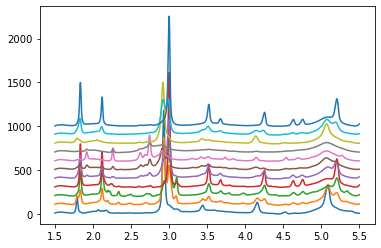

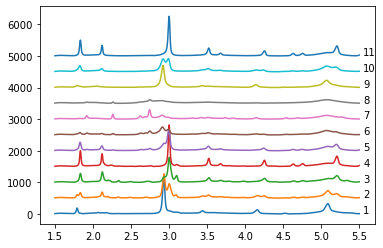

In [26]:
fig,ax = plt.subplots()
pp =0 
for ii in range(len(Big_clustave)):
    ax.plot(x_data,Big_clustave[ii]+pp)

    ax.annotate(ii+1,(5.55,pp+20))
    pp +=500

# Proving Suchi's Map should be flipped

Text(0.5, 1.0, 'Clusters Ground Truth')

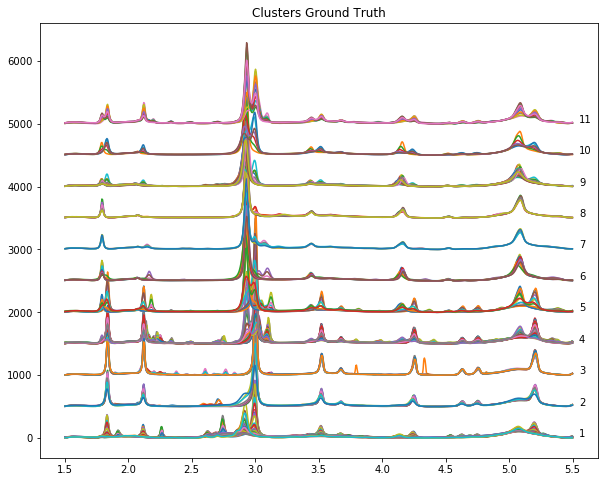

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
pp = 0
for j in range(1,12):
    
    labels_4 = [i+1 for i,v in enumerate(truth_labels) if v==j]
    #labels_11= [i+1 for i,v in enumerate(truth_labels) if v==9]
    #print(np.transpose(labels_4))

    
    for ii in labels_4:
        ax.plot(x_data,y_data[ii-1]+pp)
        
    
    
    ax.annotate(j,(5.55,pp+20))
    pp +=500

   


ax.set_title('Clusters Ground Truth')



Text(0.5, 1.0, 'Average Clusters')

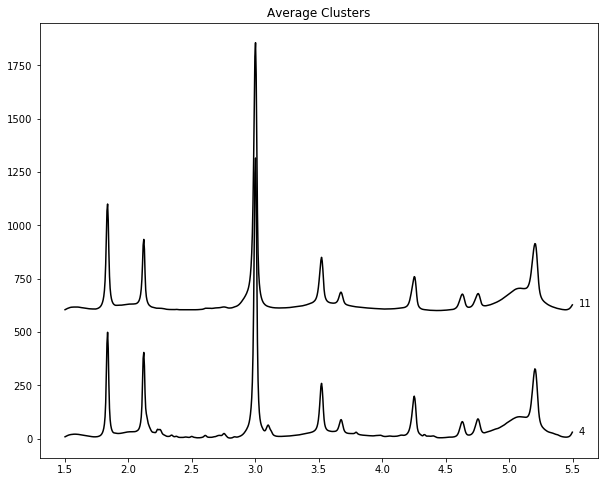

In [28]:
new_labels_4 = [i+1 for i,v in enumerate(new_truth_labels) if v==4]
new_labels_11= [i+1 for i,v in enumerate(new_truth_labels) if v==11]
# #print(np.transpose(new_labels_4))

# fig, ax = plt.subplots()
# for i in new_labels_4:
#     ax.plot(x_data,y_data[i-1])

# ax.set_title('Phase 1')


# fig, ax = plt.subplots()
# for i in new_labels_11:
#     ax.plot(x_data,y_data[i-1])
    
# ax.set_title('Phase 9')

fig, ax = plt.subplots(figsize=(10,8))
pp = 0

for j in [4,11]:
    
#     new_labels = [i+1 for i,v in enumerate(new_truth_labels) if v==j]
    
#     for ii in new_labels:
#         ax.plot(x_data,y_data[ii-1]+pp)
    
    ax.plot(x_data,Big_clustave[j-1]+pp,'k')
    ax.annotate(j,(5.55,pp+20))
    pp +=600

   

ax.set_title('Average Clusters')
#ax.set_title('Clusters Flipped Ground Truth')


Text(0.5, 1.0, 'All clusters')

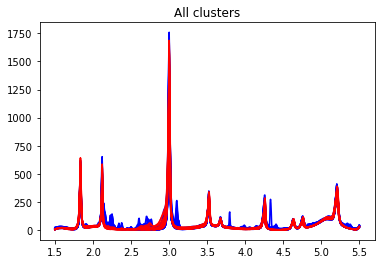

In [29]:
fig,ax = plt.subplots()
for i in new_labels_4:
    ax.plot(x_data,np.power(y_data[i-1],1),'b')
    
for i in new_labels_11:
    ax.plot(x_data,np.power(y_data[i-1],1),'r')
    
plt.title('All clusters')

#np.transpose(new_labels_4)

In [30]:
ffy = np.fft.fft(y_data).real
np.shape(ffy)

(177, 800)

# Agglomerative scores 

In [26]:
dataGrid

In [24]:
#Warning!!! Don't use JSD with Fourier; it gets some inf values

pw = ['fft']
for i in pw:
    power = i
    
    Big_labels_cos= Agglo_cluster(y_data,deal = power , metric='cosine')
    Big_labels_PC= Agglo_cluster(y_data,deal = power , metric='PC')
    #Big_labels_SC= Agglo_cluster(y_data,deal = power , metric='SC')
    #Big_labels_JSD= Agglo_cluster(y_data,deal = power , metric='JSD')
    Big_labels_AveSim= Agglo_cluster(y_data,deal = power , metric='AveSim')
    Big_labels_man= Agglo_cluster(y_data,deal = power, metric='Manhattan')
    Big_labels_sEucl= Agglo_cluster(y_data,deal = power, metric='sEuclidean')
    Big_labels_Eucl= Agglo_cluster(y_data, deal = power, metric='Euclidean')
    Big_labels_ave= Agglo_cluster(y_data, deal = power, metric = 'None')
    Big_labels_AveDist= Agglo_cluster(y_data,deal = power , metric='AveDist')

    ami_score_cos= [ami_score(new_truth_labels,Big_labels_cos[i]) for i in range(len(Big_labels_cos))]
    ar_score_cos= [ar_score(new_truth_labels,Big_labels_cos[i]) for i in range(len(Big_labels_cos))]
    fm_score_cos= [fm_score(new_truth_labels,Big_labels_cos[i]) for i in range(len(Big_labels_cos))]
    ave_score_cos = np.mean([ami_score_cos,ar_score_cos,fm_score_cos],axis=0)

    ami_score_PC= [ami_score(new_truth_labels,Big_labels_PC[i]) for i in range(len(Big_labels_PC))]
    ar_score_PC= [ar_score(new_truth_labels,Big_labels_PC[i]) for i in range(len(Big_labels_PC))]
    fm_score_PC= [fm_score(new_truth_labels,Big_labels_PC[i]) for i in range(len(Big_labels_PC))]
    ave_score_PC = np.mean([ami_score_PC,ar_score_PC,fm_score_PC],axis=0)

#     ami_score_SC= [ami_score(new_truth_labels,Big_labels_SC[i]) for i in range(len(Big_labels_SC))]
#     ar_score_SC= [ar_score(new_truth_labels,Big_labels_SC[i]) for i in range(len(Big_labels_SC))]
#     fm_score_SC= [fm_score(new_truth_labels,Big_labels_SC[i]) for i in range(len(Big_labels_SC))]
#     ave_score_SC = np.mean([ami_score_SC,ar_score_SC,fm_score_SC],axis=0)

#     ami_score_JSD = [ami_score(new_truth_labels,Big_labels_JSD[i]) for i in range(len(Big_labels_JSD))]
#     ar_score_JSD= [ar_score(new_truth_labels,Big_labels_JSD[i]) for i in range(len(Big_labels_JSD))]
#     fm_score_JSD= [fm_score(new_truth_labels,Big_labels_JSD[i]) for i in range(len(Big_labels_JSD))]
#     ave_score_JSD = np.mean([ami_score_JSD,ar_score_JSD,fm_score_JSD],axis=0)

    ami_score_AveSim = [ami_score(new_truth_labels,Big_labels_AveSim[i]) for i in range(len(Big_labels_AveSim))]
    ar_score_AveSim= [ar_score(new_truth_labels,Big_labels_AveSim[i]) for i in range(len(Big_labels_AveSim))]
    fm_score_AveSim= [fm_score(new_truth_labels,Big_labels_AveSim[i]) for i in range(len(Big_labels_AveSim))]
    ave_score_AveSim = np.mean([ami_score_AveSim,ar_score_AveSim,fm_score_AveSim],axis=0)

    ami_score_man= [ami_score(new_truth_labels,Big_labels_man[i]) for i in range(len(Big_labels_man))]
    ar_score_man= [ar_score(new_truth_labels,Big_labels_man[i]) for i in range(len(Big_labels_man))]
    fm_score_man= [fm_score(new_truth_labels,Big_labels_man[i]) for i in range(len(Big_labels_man))]
    ave_score_man = np.mean([ami_score_man,ar_score_man,fm_score_man],axis=0)

    ami_score_sEucl = [ami_score(new_truth_labels,Big_labels_sEucl[i]) for i in range(len(Big_labels_sEucl))]
    ar_score_sEucl= [ar_score(new_truth_labels,Big_labels_sEucl[i]) for i in range(len(Big_labels_sEucl))]
    fm_score_sEucl= [fm_score(new_truth_labels,Big_labels_sEucl[i]) for i in range(len(Big_labels_sEucl))]
    ave_score_sEucl = np.mean([ami_score_sEucl,ar_score_sEucl,fm_score_sEucl],axis=0)

    ami_score_Eucl = [ami_score(new_truth_labels,Big_labels_Eucl[i]) for i in range(len(Big_labels_Eucl))]
    ar_score_Eucl= [ar_score(new_truth_labels,Big_labels_Eucl[i]) for i in range(len(Big_labels_Eucl))]
    fm_score_Eucl= [fm_score(new_truth_labels,Big_labels_Eucl[i]) for i in range(len(Big_labels_Eucl))]
    ave_score_Eucl = np.mean([ami_score_Eucl,ar_score_Eucl,fm_score_Eucl],axis=0)

    ami_score_ave = [ami_score(new_truth_labels,Big_labels_ave[i]) for i in range(len(Big_labels_ave))]
    ar_score_ave= [ar_score(new_truth_labels,Big_labels_ave[i]) for i in range(len(Big_labels_ave))]
    fm_score_ave= [fm_score(new_truth_labels,Big_labels_ave[i]) for i in range(len(Big_labels_ave))]
    ave_score_ave = np.mean([ami_score_ave,ar_score_ave,fm_score_ave],axis=0)

    ami_score_AveDist = [ami_score(new_truth_labels,Big_labels_AveDist[i]) for i in range(len(Big_labels_AveDist))]
    ar_score_AveDist= [ar_score(new_truth_labels,Big_labels_AveDist[i]) for i in range(len(Big_labels_AveDist))]
    fm_score_AveDist= [fm_score(new_truth_labels,Big_labels_AveDist[i]) for i in range(len(Big_labels_AveDist))]
    ave_score_AveDist = np.mean([ami_score_AveDist,ar_score_AveDist,fm_score_AveDist],axis=0)

NameError: name 'dataGrid' is not defined

<Figure size 432x288 with 0 Axes>

In [58]:
print('Cosine = ', ave_score_cos)
print('PC = ', ave_score_PC)
#print('SC = ', ave_score_SC)
#print('JSD = ', ave_score_JSD)
print('AveSim = ', ave_score_AveSim)
print('Manhattan = ', ave_score_man)
print('Euclidean = ', ave_score_Eucl)
print('Square Euclidean = ', ave_score_sEucl)
print('Average difference = ', ave_score_ave)
print('AveDist = ', ave_score_AveDist)

Cosine =  [0.68971225]
PC =  [0.68971225]
AveSim =  [0.68971225]
Manhattan =  [0.51532637]
Euclidean =  [0.51923584]
Square Euclidean =  [0.51923584]
Average difference =  [0.51532637]
AveDist =  [0.51923584]


# Fourier Transform Dataset

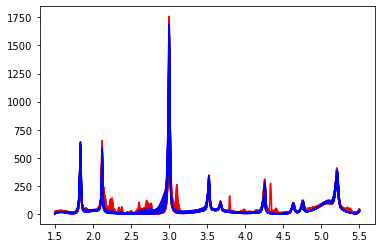

In [33]:
fig,ax = plt.subplots()

for j in range(len(Big_clustlab[3])):
    ax.plot(x_data, y_data[Big_clustlab[3][j]-1],'r')

for j in range(len(Big_clustlab[10])):
    ax.plot(x_data, y_data[Big_clustlab[10][j]-1],'b')

In [34]:
np.fft.fftfreq

<function numpy.fft.fftfreq(n, d=1.0)>

0.9722974209394676
40080.51148165361
inf


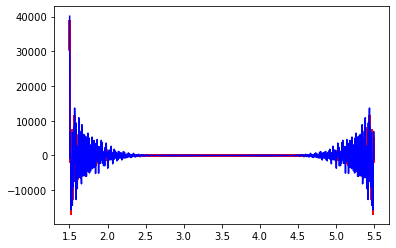

In [35]:
fig,ax = plt.subplots()

for j in range(177):#range(len(Big_clustlab[3])):
    #ftran1 = np.fft.fft(y_data[Big_clustlab[3][j]-1])
    ftran1 = np.fft.fft(y_data[44-1]).real
    ax.plot(x_data, ftran1,'r')
    #ax.plot(x_data, ftran1.imag,'k')

for j in range(1):#range(len(Big_clustlab[10])):
    #ftran2 = np.fft.fft(y_data[Big_clustlab[10][j]-1])
    ftran2 = np.fft.fft(y_data[61-1]).real
    #ftran2 = np.add(ftran2,[1]*800)
    ax.plot(x_data, ftran2,'b')
    #ax.plot(x_data, ftran2.imag,'k')
    

cos_sim = np.dot(ftran1, ftran2)/(np.linalg.norm(ftran1)*np.linalg.norm(ftran2))
jsd_sim = jsd(ftran1,ftran2)
print(cos_sim)
print(ftran2[0])
print(jsd_sim)

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


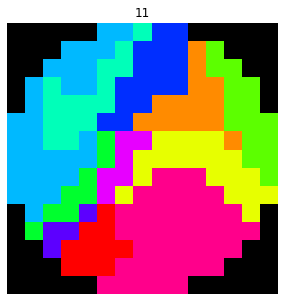

In [36]:
Big_labels_fft= Agglo_cluster(y_data,deal = 'fft' , metric='AveSim')

ami_score_fft= [ami_score(new_truth_labels,Big_labels_fft[i]) for i in range(len(Big_labels_fft))]
ar_score_fft= [ar_score(new_truth_labels,Big_labels_fft[i]) for i in range(len(Big_labels_fft))]
fm_score_fft= [fm_score(new_truth_labels,Big_labels_fft[i]) for i in range(len(Big_labels_fft))]
ave_score_fft = np.mean([ami_score_fft,ar_score_fft,fm_score_fft],axis=0)

In [37]:
print('fft = ', ave_score_fft)

fft =  [0.68971225]


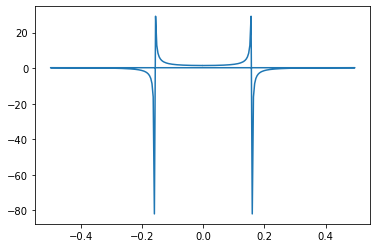

In [38]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)#, freq, sp.imag)
plt.show()

In [39]:
pp=2
if pp!=1 and pp!=2: print('Yes')

In [41]:
X = dataGrid.get_data_array()
gridno_7 = [i+1 for i,v in enumerate(Big_labels_cos[0]) if v==7]
gridno_10 = [i+1 for i,v in enumerate(Big_labels_cos[0]) if v==10]
# # View all the clusters/phases
# fig, ax = plt.subplots(figsize=(6,6))

# for i in gridno_7:
#     #fig,ax = plt.subplots()
#     #ax = fig.add_subplot(2,5,i+1)
#     ax.plot(dataGrid.data[1][:,0], X[i-1])
#     ax.set_title('Phase 10')


(177, 800)


In [42]:
np.shape(Big_labels_cos)

(1, 177)

# NMF

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


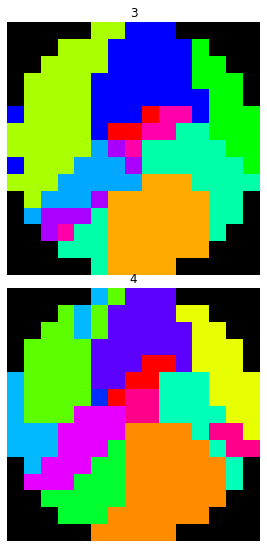

(2, 177)


In [43]:
Big_labels=[]
ami_score_nmfpk3=[]
ar_score_nmfpk3=[]
fm_score_nmfpk3=[]

for i in [0.7]:
    for j in [0.15]:
        labels = nmf_cluster(3,5,deal = 'None', use_peak=1,visualize=0,pear_threshold=i,peak_threshold=3,contri_threshold=j)
        print(np.shape(labels))
        ami_score_nmf = [ami_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ar_score_nmf= [ar_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        fm_score_nmf= [fm_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ami_score_nmfpk3= ami_score_nmfpk3+ami_score_nmf
        ar_score_nmfpk3=ar_score_nmfpk3+ar_score_nmf
        fm_score_nmfpk3=fm_score_nmfpk3+fm_score_nmf
        Big_labels=Big_labels + labels

# NMF Fourier

### Results were terrible :-(

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
(1, 2) (0,)
Here are the clusters indices taken out [1]
Former H is of shape (3, 177)
new_H is of shape (2, 177)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
(2, 2) (0,)
Here are the clusters indices taken out [2, 3]
Former H is of shape (4, 177)
new_H is of shape (2, 177)
.....................................5 Clu

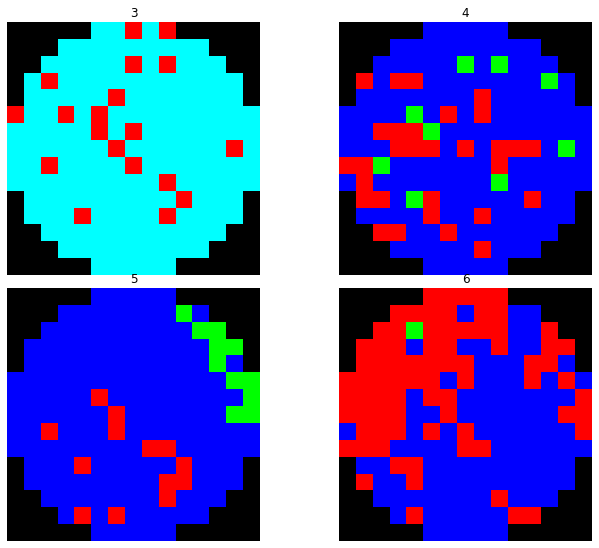

(4, 177)


In [56]:
Big_labels=[]
ami_score_nmfpk3=[]
ar_score_nmfpk3=[]
fm_score_nmfpk3=[]

for i in [0.7]:
    for j in [0.05]:
        labels = nmf_cluster(3,7,deal = 'fft', use_peak=0,visualize=0,pear_threshold=i,peak_threshold=3,contri_threshold=j)
        print(np.shape(labels))
        ami_score_nmf = [ami_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ar_score_nmf= [ar_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        fm_score_nmf= [fm_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ami_score_nmfpk3= ami_score_nmfpk3+ami_score_nmf
        ar_score_nmfpk3=ar_score_nmfpk3+ar_score_nmf
        fm_score_nmfpk3=fm_score_nmfpk3+fm_score_nmf
        Big_labels=Big_labels + labels

In [55]:
print(np.transpose(Big_labels[0]))
#print(np.transpose(Big_labels[1]))

np.transpose(truth_labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1
 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 2]


array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  3,  3,  3,  3,  4,  4,  4, 11,  4,  4,  4,  4,  3,
        3,  3,  2,  2,  4,  4,  4, 11, 11,  4,  4,  4,  3,  3,  2,  2,  1,
        5,  5,  4, 11, 11, 11,  4,  4,  5,  5,  2,  2,  1,  1,  1,  6,  5,
        5, 11, 11, 11,  4,  5,  5,  2,  2,  1,  1,  1,  1,  7,  6,  5,  5,
       11, 11,  5,  5,  2,  2,  1,  1,  1,  1,  1,  7,  7,  6,  5,  5,  5,
        5, 10, 10,  2,  1,  1,  1,  1,  1,  7,  7,  6,  6, 10, 10, 10, 10,
       10,  9,  1,  1,  1,  1,  1,  8,  8,  6,  6,  6,  6,  9,  9,  9,  1,
        1,  1,  1,  8,  8,  8,  6,  9,  9,  9,  9,  9,  1,  1,  1,  1,  8,
        8,  6,  9,  9,  9,  9,  1,  1,  1,  1,  8,  6,  9,  9,  9,  9,  1,
        1,  1,  9,  9,  9,  1,  1])

In [46]:
fm_score_nmfpk3

[0.32225158520900704, 0.29296521478736864]

In [47]:
ami_score_nmf2 = [ami_score(truth_labels,Big_labels[i]) for i in range(len(Big_labels))]
ar_score_nmf2= [ar_score(truth_labels,Big_labels[i]) for i in range(len(Big_labels))]
fm_score_nmf2= [fm_score(truth_labels,Big_labels[i]) for i in range(len(Big_labels))]

In [48]:
[ar_score(truth_labels,Big_labels[i]) for i in range(len(Big_labels))]

[0.016174825819554123, 0.020862041830193807]

In [49]:
ar_score_nmfpk3

[0.008561948185997781, 0.020168765012986013]

In [50]:
ami_score_nmfpk2 = ami_score_nmf1+ami_score_nmf2+ami_score_nmf3+ami_score_nmf4+ami_score_nmf5+ami_score_nmf6+ami_score_nmf7+ami_score_nmf8+ami_score_nmf9
ar_score_nmfpk2 = ar_score_nmf1+ar_score_nmf2+ar_score_nmf3+ar_score_nmf4+ar_score_nmf5+ar_score_nmf6+ar_score_nmf7+ar_score_nmf8+ar_score_nmf9
fm_score_nmfpk2 = fm_score_nmf1+fm_score_nmf2+fm_score_nmf3+fm_score_nmf4+fm_score_nmf5+fm_score_nmf6+fm_score_nmf7+fm_score_nmf8+fm_score_nmf9

NameError: name 'ami_score_nmf1' is not defined

In [ ]:
score_nmfpk3=[ami_score_nmfpk3,ar_score_nmfpk3,fm_score_nmfpk3]
np.shape(score_nmfpk3)
#score_nmfpk3[0].index(np.max(score_nmfpk3,axis=1)[0])
#avescore_nmfpk2=np.mean(score_nmfpk2,axis=0)
avescore_nmfpk3=np.mean(score_nmfpk3,axis=0)
print(np.max(avescore_nmfpk3),np.argmax(avescore_nmfpk3))
avescore_nmfpk3

In [ ]:
pp=0
maxes=[]; maxes_ind=[]
vv = list(avescore_nmfpk2)
for i in range(8):
    maxes.append(np.max(vv))
    maxes_ind.append(np.argmax(vv))
    vv[np.argmax(vv)]=pp
print(maxes_ind)
print(maxes)
avescore_nmfpk2

In [ ]:
np.savetxt('score_nmfpk3.csv',np.transpose(score_nmfpk3),delimiter =',')

# Plot Ground Truth wafer map

In [ ]:
# Find coordinate centroid of each cluster
Big_centroid=[] #has to be (2,11) 2(x,y) by 11clusters 


for clust in range(max(new_truth_labels)+1):
    clust_grid = [i+1 for i,v in enumerate(new_truth_labels) if v==clust+1]
    clust_coord =  [dataGrid.coord(v) for i,v in enumerate(clust_grid)]
    centr = np.mean(clust_coord,axis=0)
    Big_centroid.append(centr)


np.shape(Big_centroid)

In [ ]:
#Get the labels' hues

#hues = [float(float(x)/float(max(new_lab)+1)) for x in range(1,max(new_lab)+2)]
#hues = [float(float(x)/float(max(Big_labels2[1])+1)) for x in range(1,max(Big_labels2[1])+2)]
hues = [float(float(x)/float(max(new_truth_labels))) for x in range(1,max(new_truth_labels)+1)]
#hues = [0.09090909090909091,0.18181818181818182,0.23727272727272727,0.36363636363636365,0.45454545454545453,
 #       0.5454545454545454,0.6363636363636364,0.7272727272727273,0.8181818181818182,0.9090909090909091,1.0]
cluster_grid = np.zeros(shape = (15,15,3))
for val in range(1,178):
    x,y = dataGrid.coord(val)
    cluster = new_truth_labels[val-1] - 1
    #cluster = Big_labels2[1][val-1]
    #cluster = new_lab[val-1]
    #cluster_grid[15-y][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster-1],1,1])
    cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
    
    
#Show on a wafer map
ax=plt.figure(figsize=(4,4))
#fig = plt.figure()
ax.tight_layout()
ax=ax.add_axes([0,0,1,1])

#ax = fig.add_subplot(1,b-a,i-a+1)
plt.imshow(cluster_grid)

ax.invert_yaxis()
#ax.invert_xaxis()
#ax.set_title('Cosine with 11 clusters')
ax.set_title('Ground Truth')
for i in range(max(new_truth_labels)+1):
    cc = np.subtract(Big_centroid[i],[1,1])
    if i == 4: cc= cc + [0,1.2]
    ax.annotate(str(i+1),(cc))
    #print(i)
ax.axis("off")

#k=.03
#plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)
#plt.show()
np.transpose(new_truth_labels)

In [ ]:
hues

In [ ]:
#Make the clusters look the same
labels = Big_labels[0]

hues = [0.09090909090909091,0.18181818181818182,0.2727272727272727,0.36363636363636365,0.45454545454545453,
        0.5454545454545454,0.6363636363636364,0.7272727272727273,0.8181818181818182,0.9090909090909091,1.0]
new_hues = [0.36363636363636365,0.09090909090909091,0.7272727272727273,0.23727272727272727,0.18181818181818182,
            0.8181818181818182,0.6363636363636364,0.45454545454545453,1.0,0.9090909090909091,0.5454545454545454]

# Find coordinate centroid of each cluster
Big_centroid1=[] #has to be (2,11) 2(x,y) by 11clusters 


for clust in range(max(labels)+1):
    clust_grid1 = [i+1 for i,v in enumerate(labels) if v==clust]
    clust_coord1 =  [dataGrid.coord(v) for i,v in enumerate(clust_grid1)]
    centr = np.mean(clust_coord1,axis=0)
    Big_centroid1.append(centr)


np.shape(Big_centroid1)


cluster_grid = np.zeros(shape = (15,15,3))
for val in range(1,178):
    x,y = dataGrid.coord(val)
    #cluster = new_truth_labels[val-1] -1
    cluster = labels[val-1]
    #print(cluster)
    #cluster_grid[15-y][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
    cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([new_hues[cluster],1,1])
    
#Show on a wafer map
ax=plt.figure(figsize=(4,4))
#fig = plt.figure()
ax.tight_layout()
ax=ax.add_axes([0,0,1,1])

#ax = fig.add_subplot(1,b-a,i-a+1)
plt.imshow(cluster_grid)

ax.invert_yaxis()
#ax.invert_xaxis()
ax.axis("off")


# for i in range(max(labels)+1):
#     cc = np.subtract(Big_centroid1[i],[1,1])
#     if i == 4: cc= cc - [0,1.2]
#     ax.annotate(str(i+1),(cc))
#     #print(i)


#k=.03
#plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)
#plt.show()
print(labels)
print(new_truth_labels)


In [ ]:
print(Big_labels)

In [ ]:
# This code was very very important in reshaping the labels
'''
new_lab=[None]*177
grid_no=[]
X=[]
Y=[]
for i in range(0,177):
    grid_no.append(i+1)
    x,y=dataGrid.coord(i+1)
    X.append(x);Y.append(y)
    new_grid=dataGrid.grid_num(16-x,y)
    new_lab[new_grid-1]=Big_labels2[1][i]
'''

In [ ]:
np.shape(np.flip(Big_labels[0]))

In [ ]:
dataGrid.coord(52)

In [ ]:
grid_values = [grid_no,X,Y]

In [ ]:
np.shape(grid_values);pp=np.transpose(grid_values)
np.shape(pp)

In [ ]:
np.savetxt('TiNiSn_500C_grid_values.csv',pp,delimiter =',')

In [ ]:
max(Big_labels[0])

In [ ]:
x,y=dataGrid.coord(173)
dataGrid.grid_num(16-x,y)

In [ ]:
Big_labels[0][173]

In [ ]:
>>> import numpy as np
>>> X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
>>> from sklearn.decomposition import NMF
>>> model = NMF(n_components=2, init='random', random_state=None)
>>> W = model.fit_transform(X)
>>> H = model.components_

In [ ]:
H

In [ ]:
W

In [ ]:
np.dot(a, b)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)

In [ ]:
np.shape(y_data)